In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.linalg import solve
from scipy import interpolate

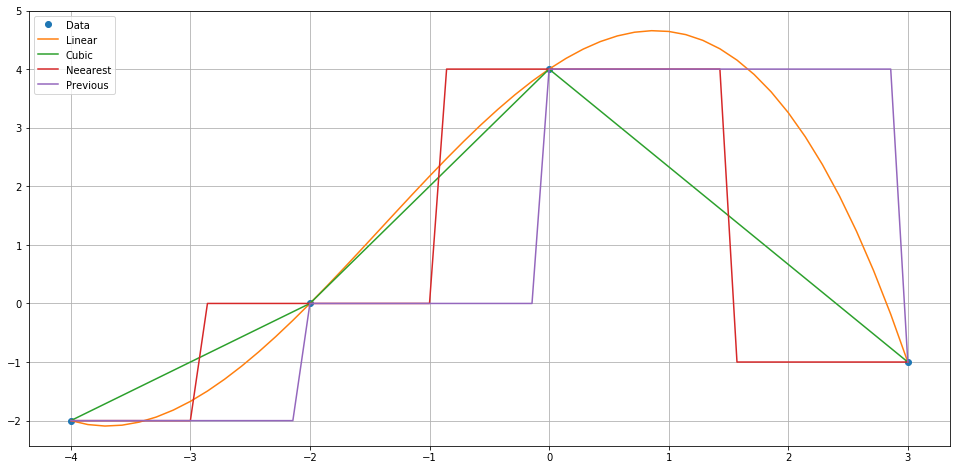

In [3]:

xi = [-4, -2, 0, 3]
yi = [-2, 0, 4, -1]
#xi = [1,2,3,4,5,6]
#yi = [1.0002, 1.0341, 0.6, 0.40105, 0.1, 0.23975]
ls = interpolate.interp1d(xi, yi)
cs = CubicSpline(xi, yi)
ns = interpolate.interp1d(xi, yi, kind='nearest')
f2 = interpolate.interp1d(xi, yi, kind='previous')
#f3 = interpolate.interp1d(x, y, kind='next')
xs = np.linspace(-4, 3)
plt.figure(figsize=(16.5, 8))
plt.plot(xi, yi, 'o', label='Data')
plt.plot(xs, cs(xs), label="Liear Spline")
plt.plot(xs, ls(xs), label="Cubic Spline")
plt.plot(xs, ns(xs), label="Neearest Spline")
plt.plot(xs, f2(xs), label="Previous Spline")
#plt.xlim(-5, 6.5)
plt.legend(['Data', 'Linear', 'Cubic', "Neearest", "Previous"], loc='best')
plt.grid()
plt.show()


# Завдання 1

Побудувати кубічний сплайн для таблично заданої функції, з граничними умовами для першої похідної.
S’(a) = -1
S’(b) = 1

In [4]:
def s_(a, b, c, d, xp, x_):
    return a + b*(x_-xp) + c*(x_-xp)**2+d*(x_-xp)**3

In [5]:
def m(hi, ii, l):
    t = (l-2,l)
    t_ = (l-2,l-2)
    b_ = np.zeros(l-2)
    for i in range(l-2):
        b_[i] = 6*(ii[i+1] - ii[i])
    q = np.zeros(t)
    qt = np.zeros(t_)
    for i in range(0, l-2):
        q[i, i] = hi[i]
        q[i,i+1] = 2*(hi[i+1]+hi[i])
        q[i, i+2] = hi[i+1]
    for i in range(0, l-2):
        for j in range( l-2):
            qt[i,j] = q[i, j+1]
    q = np.matrix(qt)
    b_ = np.array(b_)
    answer = solve(q, b_)
    return answer

In [6]:
xi = [-4, -2, 0, 3]
yi = [-2, 0, 4, -1]
#xi = [1,2,3,4,5,6]
#yi = [1.0002, 1.0341, 0.6, 0.40105, 0.1, 0.23975]
ls = interpolate.interp1d(xi, yi)
sa = -1
sb = 1
l = len(xi)
ai = [yi[i] for i in range(l-1)]
hi = [xi[i+1] - xi[i] for i in range(l-1)]
ii = [(yi[i+1] - yi[i])/hi[i] for i in range(l-1)]
print("hi = ", hi)
print("di = ", ii)
mi_ = m(hi, ii, l)
m0 = 0 #3*(ii[0]-sa)/hi[0] - mi_[0]/2
mn = 0 #3*(sb - ii[l-2])/hi[l-2]- mi_[l-3]/2
mi = []
mi.append(m0)
for i in range(l-2):
    mi.append(mi_[i])
mi.append(mn)
ci = [mi[i]/2 for i in range(l-1)]
bi = [ii[i]-hi[i]*(2*mi[i] + mi[i+1])/6 for i in range(l-1)]
bi[l-2] = ii[l-2]-2*ci[l-2]*hi[l-2]/3
di = [(mi[i+1] - mi[i])/(6*hi[i]) for i in range(l-1)]
di[l-2] = -ci[l-2]/(3*hi[l-2])

print("sk0 = ",ai)
print("sk1 = ",bi)
print("sk2 = ",ci)
print("sk3 = ",di)

hi =  [2, 2, 3]
di =  [1.0, 2.0, -1.6666666666666667]
sk0 =  [-2, 0, 4]
sk1 =  [0.5438596491228069, 1.912280701754386, 0.8070175438596492]
sk2 =  [0.0, 0.6842105263157895, -1.236842105263158]
sk3 =  [0.11403508771929825, -0.3201754385964912, 0.13742690058479534]


In [7]:
x_ = 2
y_ = 0
i = 0

while i < l-1:
    if (x_> xi[i]) and (x_<xi[i+1]):
        print(type(ai[i]), type(bi[i]), type(ci[i]), type(di[i]), type(xi[i]), type(x_))
        y_ = s_(ai[i], bi[i], ci[i], di[i], xi[i], x_)

    i +=1
y_

<class 'int'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'int'> <class 'int'>


1.7660818713450288

In [8]:
y = []
x = []
k = 200
for i in range(l-1):
    x.append(np.linspace(xi[i], xi[i+1], k))
x = np.matrix(x)
print(type(x))
i = 0
while i < l-1:
    for j in range(k):
        y.append(s_(ai[i], bi[i], ci[i], di[i], xi[i], x[i,j]))
    i+=1

<class 'numpy.matrixlib.defmatrix.matrix'>


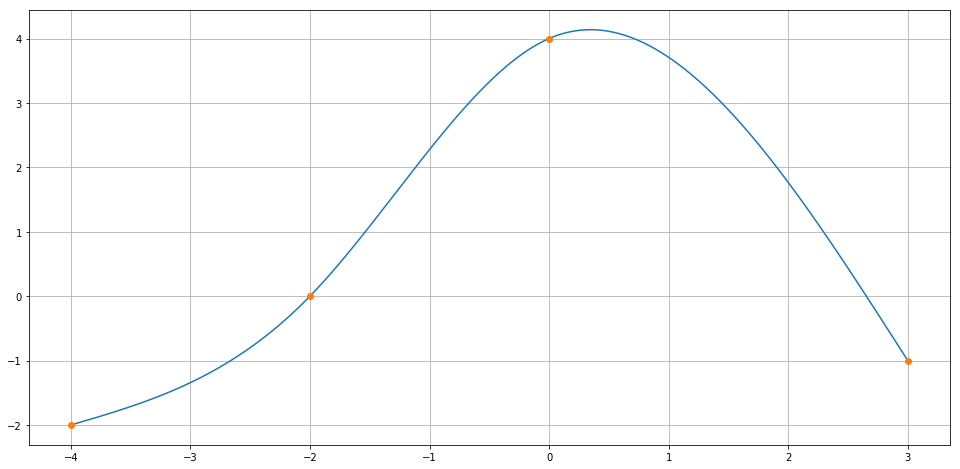

In [9]:
xt = []
i=0
while i < l-1:
    for j in range(k):
        xt.append(x[i,j])
    i+=1
plt.figure(figsize=(16.5, 8))
plt.plot(xt, y)
plt.grid()
plt.plot(xi, yi, 'o')
#plt.plot(xs, cs(xs))